In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the dataset
fifa=pd.read_csv('data.csv')

In [3]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
#Checking out our columns
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
#checking data types for our columns
fifa.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

In [6]:
#Dropping unwanted columns
fifa.drop(['Unnamed: 0','Photo','Flag','Club Logo'],axis=1,inplace=True)

In [7]:
#Checking out null values
fifa.isnull().sum()

ID                   0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 85, dtype: int64

In [8]:
missing_height = fifa[fifa['Height'].isnull()].index.tolist()
missing_weight = fifa[fifa['Weight'].isnull()].index.tolist()
if missing_height == missing_weight:
    print('They are same')
else:
    print('They are different')

They are same


In [9]:
fifa.drop(fifa.index[missing_height],inplace =True)

In [10]:
#displaying full list of columns with no. of null values that they posses
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(fifa.isnull().sum())

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                       0
Real Face                       0
Position                       12
Jersey Number                  12
Joined                       1505
Loaned From                 16895
Contract Valid Until          241
Height                          0
Weight                          0
LS                           2037
ST                           2037
RS                           2037
LW                           2037
LF                           2037
CF            

In [11]:
fifa.drop(['Loaned From','Release Clause','Joined'],axis=1,inplace=True)

In [12]:
#Displaying top 5 countries and clubs with most players
print(fifa['Nationality'].value_counts().head(5))
print(fifa['Club'].value_counts().head(5))


England      1657
Germany      1195
Spain        1071
Argentina     936
France        911
Name: Nationality, dtype: int64
Real Madrid                33
Wolverhampton Wanderers    33
Rayo Vallecano             33
TSG 1899 Hoffenheim        33
Empoli                     33
Name: Club, dtype: int64


In [13]:
#Converting salary into proper numeric value
#'M' is for million therefor we drop 'M' as a suffix and multiply its value by 10^6
def value_to_int(fifa_value):
    try:
        value=float(fifa_value[1:-1])
        suffix=fifa_value[-1:]
        if suffix=='M':
            value=value*1000000
        elif suffix=='K':
            value=value*1000
    except ValueError:
        value=0
    return value

fifa['Value']=fifa['Value'].apply(value_to_int)
fifa['Wage']=fifa['Wage'].apply(value_to_int)

    

In [14]:
fifa.head()


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [15]:
print('Most valued player : '+str(fifa.loc[fifa['Value'].idxmax()][1]))
print('Highest earner : '+str(fifa.loc[fifa['Wage'].idxmax()][1]))

Most valued player : Neymar Jr
Highest earner : L. Messi


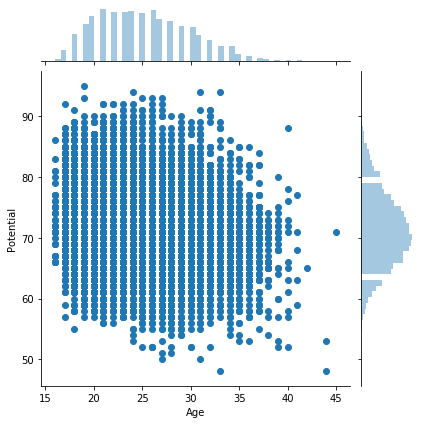

In [16]:
sns.jointplot(x=fifa['Age'],y=fifa['Potential'])

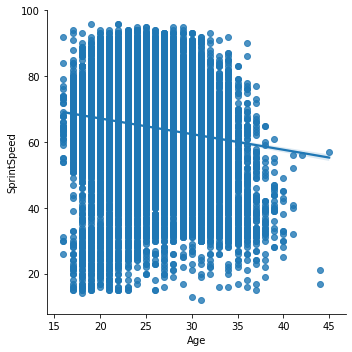

In [17]:
sns.lmplot(data = fifa, x = 'Age', y = 'SprintSpeed')

In [18]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKRe

In [19]:
drop_cols = fifa.columns[28:54]
fifa = fifa.drop(drop_cols, axis = 1)


In [20]:
fifa = fifa.drop(['ID','Jersey Number','Special','Body Type','Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)


In [21]:
fifa = fifa.dropna()
fifa.head()

,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,Left,5.0,4.0,4.0,Medium/ Medium,Yes,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Right,5.0,4.0,5.0,High/ Low,Yes,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Right,5.0,5.0,5.0,High/ Medium,Yes,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,27,Belgium,91,92,Right,4.0,5.0,4.0,High/ High,Yes,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,27,Belgium,91,91,Right,4.0,4.0,4.0,High/ Medium,Yes,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0


In [22]:
fifa = fifa.drop('Position',axis=1)

In [23]:
fifa = fifa.drop('Work Rate',axis=1)

In [24]:
#Creating a funtion to return 0 or 1 as per our feature requirement
def face_to_num(fifa):
    if (fifa['Real Face'] == 'Yes'):
        return 1
    else:
        return 0
    
def right_footed(fifa):
    if (fifa['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0

nat_counts = fifa.Nationality.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()


def major_nation(df):
    if (df.Nationality in nat_list):
        return 1
    else:
        return 0

fifa1 = fifa.copy()    
fifa1['Real_Face'] = fifa1.apply(face_to_num, axis=1)
fifa1['Right_Foot'] = fifa1.apply(right_footed, axis=1)
fifa1['Major_Nation'] = fifa1.apply(major_nation,axis = 1)
fifa1 = fifa1.drop(['Preferred Foot','Real Face', 'Nationality'], axis = 1)

In [25]:
fifa1 = fifa1.drop(['LS','ST','RS','LW','LF','CF'], axis = 1)

In [26]:
#Assigning values to our independent variable X and dependent variable y
y=fifa1['Overall']
X=fifa1.drop(['Overall'],axis=1)

In [27]:
#Importing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [28]:
#To display shape of our training data
X_train.shape

(12897, 36)

In [29]:
#To display shape of our test data
X_test.shape

(3225, 36)

In [30]:
#To display shape of our training data
y_train.shape

(12897,)

In [31]:
#To display shape of our test data
y_test.shape

(3225,)

In [32]:
#Initialsing and then fitting and predicting our linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [33]:
#Printing coefficient of determination i.e. r^2 and mean square error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9215170358039309
RMSE : 1.8839456481634136


In [35]:
#printing train and test score of our model
print('Train Score: ', model.score(X_train,y_train))  
print('Test Score: ', model.score(X_test, y_test))  

Train Score:  0.9264044855370771
Test Score:  0.9215170358039309


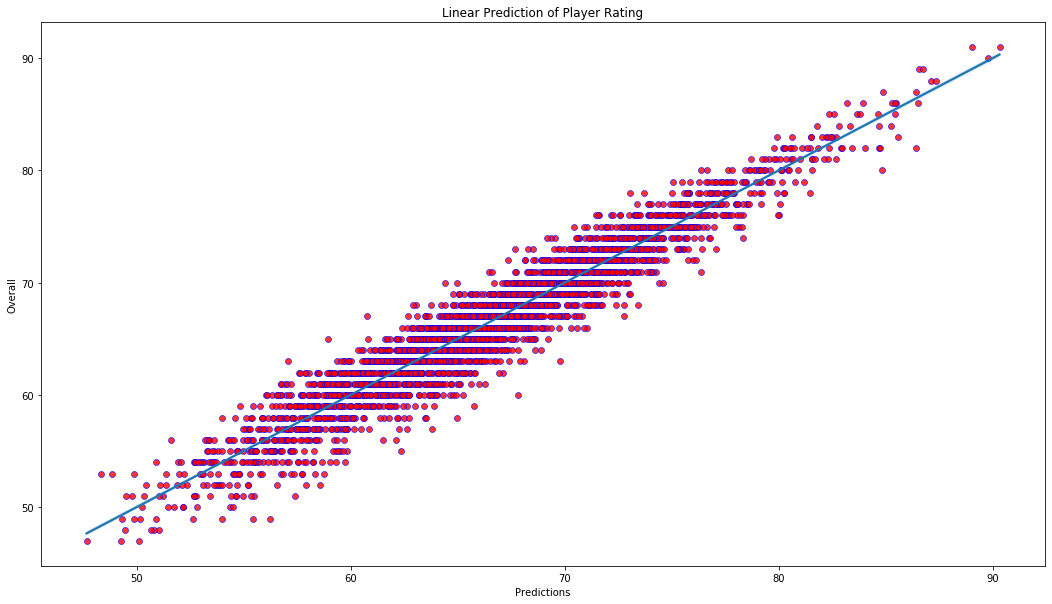

In [36]:
#Visualising the results
plt.figure(figsize=(18,10))
sns.regplot(predictions,y_test,scatter_kws={'color':'red','edgecolor':'blue','linewidth':'0.7'})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()